## Sales prediction based on the amount spend on advertisement

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Import data

df= pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv", index_col=0)
print("Data imported successfully")

Data imported successfully


In [3]:
# Print first five rows
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# no. of rows and columns
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
print("No. of duplicate rows is", df.duplicated().sum())

No. of duplicate rows is 0


### Correlations

In [8]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

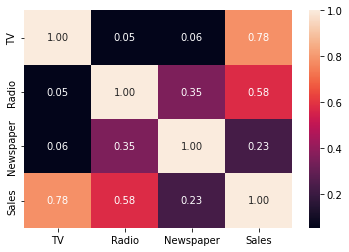

In [9]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

#### Sales is highly collerated with "TV" advertisement and have moderate and low correlation with "Radio" and "Newspaper" repectively

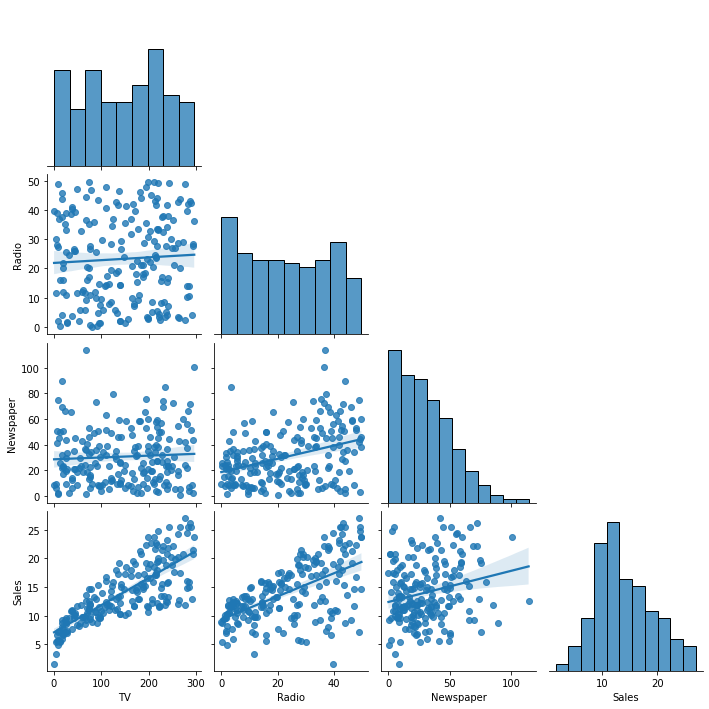

In [10]:
sns.pairplot(df, kind="reg",corner=True, );

### Data preparation 

In [11]:
# Seperate data into features and labels
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
# Split data for training and testing
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=45)
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)

Shape of X_train (160, 3)
Shape of y_train (160,)


### Multiple Linear Regression

##### Create model with all three features

In [13]:
# Create regressor for Multiple Regression
mul_reg= LinearRegression()

In [14]:
# fit the train data in the model
mul_reg.fit(X_train, y_train)

LinearRegression()

### Test the model

In [15]:
# predict sales for test data
pred = mul_reg.predict(X_test)

In [16]:
# compare actual sales to predicted sales
compare= pd.DataFrame({"y_test":list(y_test), "pred":list(pred)})
compare.head()

,y_test,pred
0,14.9,15.188873
1,8.8,10.205411
2,16.6,16.439320
3,23.8,21.808189
4,12.0,15.887521


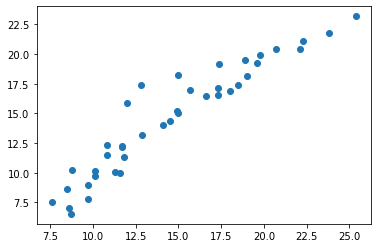

In [17]:
# plot of the comparison
plt.scatter(y_test, pred)

### Model Evaluation

In [18]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, pred)
print("Mean Absolute error:{}".format(MAE))

MSE = metrics.mean_squared_error(y_test, pred)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(y_test, pred)
print("R2 Score:{}".format(R2))


Mean Absolute error:1.0788802763848646
Mean Squared error: 1.5021631892976657
R2 Score:0.8955882331233612


#### Thankyou